In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from scipy.io import loadmat

data = loadmat('/content/drive/MyDrive/DREAMER.mat')


In [ ]:
data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'DREAMER'])

In [ ]:
import os
os.listdir('/content')


['.config', 'drive', 'sample_data']

In [ ]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ta = loadmat('/content/drive/MyDrive/DREAMER.mat')


In [ ]:
data = ta['DREAMER'][0,0]['Data'][0]

valence = []
arousal = []
dominance = []
stimulus = []
subject = []

for subj_id, subj in enumerate(data):
    ratings = subj['ScoreValence'][0]
    ratings_a = subj['ScoreArousal'][0]
    ratings_d = subj['ScoreDominance'][0]

    for stim_id in range(len(ratings)):
        valence.append(ratings[stim_id][0])
        arousal.append(ratings_a[stim_id][0])
        dominance.append(ratings_d[stim_id][0])
        stimulus.append(stim_id)
        subject.append(subj_id)

df = pd.DataFrame({
    'subject': subject,
    'stimulus': stimulus,
    'valence': valence,
    'arousal': arousal,
    'dominance': dominance
})

df.head()


,subject,stimulus,valence,arousal,dominance
0,0,0,[4],[3],[2]
1,1,0,[3],[2],[2]
2,2,0,[3],[4],[2]
3,3,0,[3],[3],[1]
4,4,0,[4],[2],[2]


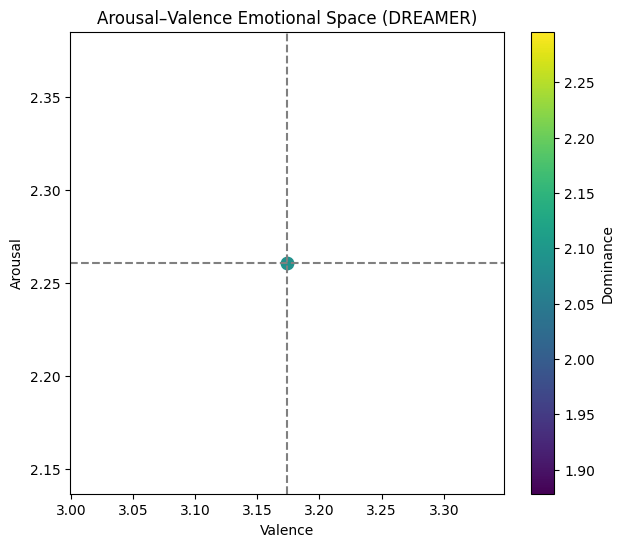

In [ ]:
avg_df = df.groupby('stimulus')[['valence','arousal','dominance']].mean()

plt.figure(figsize=(7,6))
plt.scatter(avg_df['valence'], avg_df['arousal'],
            c=avg_df['dominance'], cmap='viridis', s=80)

plt.axhline(avg_df['arousal'].mean(), linestyle='--', color='gray')
plt.axvline(avg_df['valence'].mean(), linestyle='--', color='gray')

plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.title('Arousal–Valence Emotional Space (DREAMER)')
plt.colorbar(label='Dominance')
plt.show()


In [ ]:
avg_df.dtypes


,0
valence,object
arousal,object
dominance,object


In [ ]:
avg_df = avg_df.astype({
    'valence': 'float',
    'arousal': 'float',
    'dominance': 'float'
})


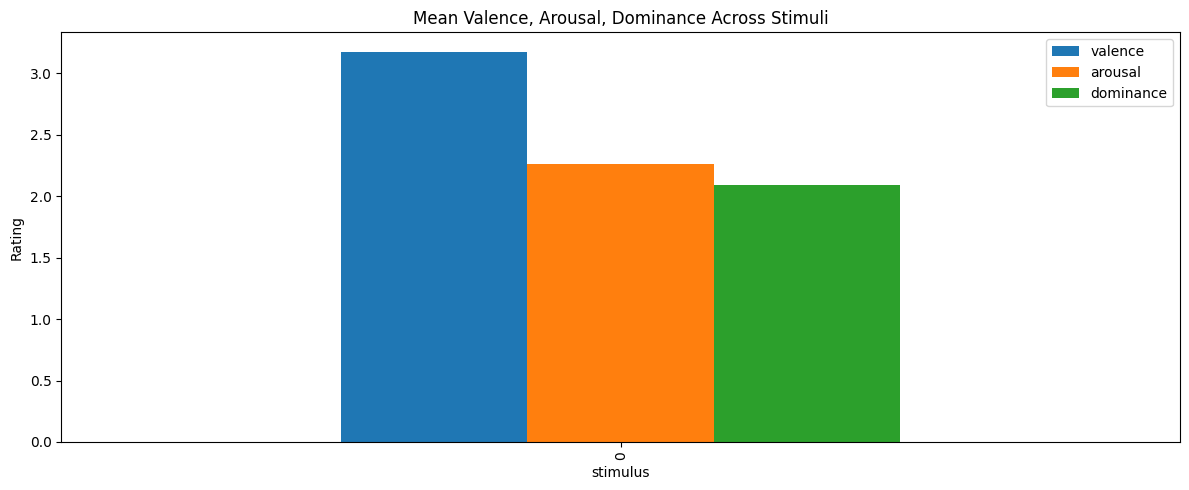

In [ ]:
avg_df[['valence','arousal','dominance']].plot(
    kind='bar',
    figsize=(12,5)
)

plt.ylabel('Rating')
plt.title('Mean Valence, Arousal, Dominance Across Stimuli')
plt.tight_layout()
plt.show()


In [ ]:
df['valence'] = df['valence'].astype(float)
df['arousal'] = df['arousal'].astype(float)
df['dominance'] = df['dominance'].astype(float)


In [ ]:
avg_df = df.groupby('stimulus')[['valence','arousal','dominance']].mean()


In [ ]:
!pip install mne


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 31.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import mne
from scipy.io import loadmat


In [ ]:
ta = loadmat('/content/drive/MyDrive/DREAMER.mat')
data = ta['DREAMER'][0,0]['Data'][0]


In [ ]:
import mne


In [ ]:
import numpy as np
import mne
from scipy.io import loadmat


In [ ]:
ta = loadmat('/content/drive/MyDrive/DREAMER.mat')
data = ta['DREAMER'][0,0]['Data'][0]


In [ ]:
# select subject 0, stimulus 0
subj = data[0]

# EEG structure
eeg_struct = subj['EEG'][0][0]

# stimulus EEG (this is numeric)
eeg = eeg_struct['stimuli'][0][0]   # shape: (14, samples)


In [ ]:
# pick subject 0
subj = data[0]

# access EEG structure
eeg_struct = subj['EEG'][0][0]

# access stimulus EEG (still nested)
stim_eeg = eeg_struct['stimuli'][0]

# select stimulus 0 and unwrap completely
eeg = stim_eeg[0][0]


In [ ]:
stimuli = eeg_struct['stimuli']


In [ ]:
stimuli = stimuli[0, 0]


In [ ]:
print(type(stimuli))
print(stimuli.shape)


<class 'numpy.ndarray'>
(18, 1)


In [ ]:
stim0 = stimuli[0, 0]


In [ ]:
print(type(stim0))
print(stim0.shape)


<class 'numpy.ndarray'>
(25472, 14)


In [ ]:
eeg = stim0.astype(np.float64)
print(eeg.shape)


(25472, 14)


In [ ]:
eeg = eeg.T
print(eeg.shape)


(14, 25472)


In [ ]:
import mne

sfreq = 128  # sampling frequency

ch_names = ['AF3','F7','F3','FC5','T7','P7','O1',
            'O2','P8','T8','FC6','F4','F8','AF4']

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
raw = mne.io.RawArray(eeg, info)


Creating RawArray with float64 data, n_channels=14, n_times=25472
    Range : 0 ... 25471 =      0.000 ...   198.992 secs
Ready.


In [ ]:
raw_notch = raw.copy().notch_filter(freqs=50)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)



NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


/tmp/ipython-input-1537780057.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=60)
/tmp/ipython-input-1537780057.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_notch.plot_psd(fmax=60)


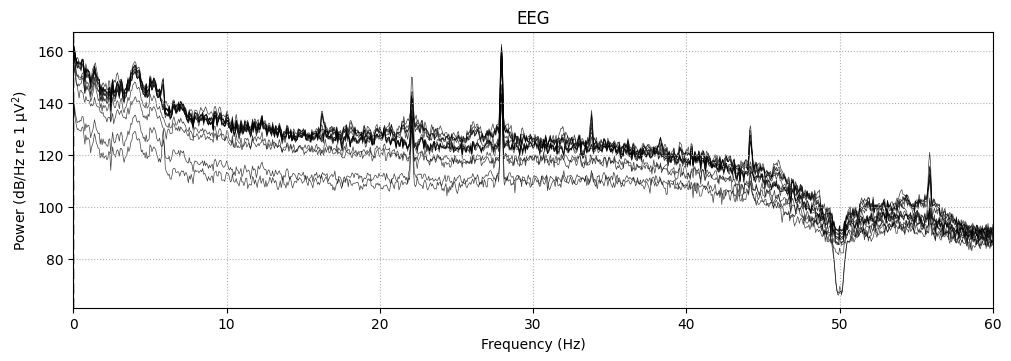

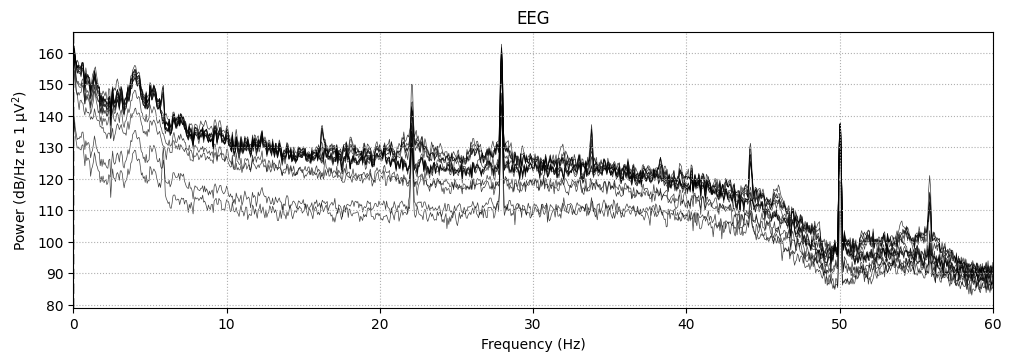

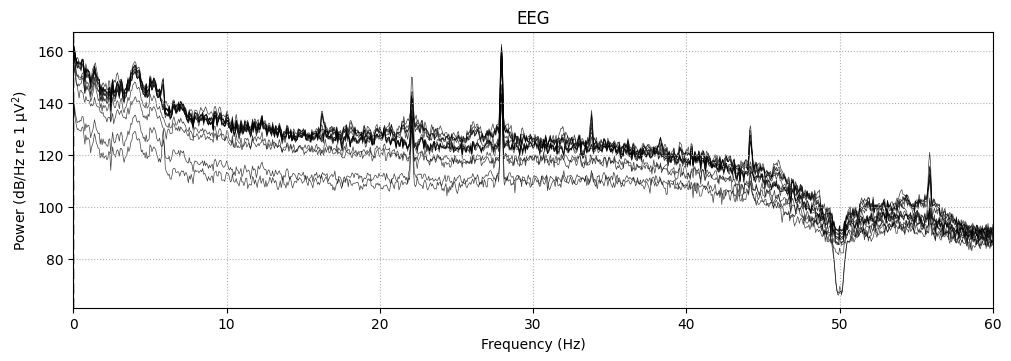

In [ ]:
raw.plot_psd(fmax=60)
raw_notch.plot_psd(fmax=60)


In [ ]:
raw_filt = raw_notch.copy().filter(l_freq=0.5, h_freq=45)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 845 samples (6.602 s)



In [ ]:
from mne.preprocessing import ICA

ica = ICA(n_components=14, random_state=97, max_iter='auto')
ica.fit(raw_filt)


Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 2.2s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,19 iterations on raw data (25472 samples)
ICA components,14
Available PCA components,14
Channel types,eeg
ICA components marked for exclusion,—


In [ ]:
montage = mne.channels.make_standard_montage('standard_1020')
raw_filt.set_montage(montage)


<RawArray | 14 x 25472 (199.0 s), ~2.7 MiB, data loaded>

In [ ]:
emotiv_chs = [
    'AF3','F7','F3','FC5','T7','P7','O1',
    'O2','P8','T8','FC6','F4','F8','AF4'
]


In [ ]:
raw_filt.rename_channels(
    {old: new for old, new in zip(raw_filt.ch_names, emotiv_chs)}
)


<RawArray | 14 x 25472 (199.0 s), ~2.7 MiB, data loaded>

In [ ]:
montage = mne.channels.make_standard_montage('standard_1020')
raw_filt.set_montage(montage, match_case=False)


<RawArray | 14 x 25472 (199.0 s), ~2.7 MiB, data loaded>

In [ ]:
emotiv_chs = [
    'AF3','F7','F3','FC5','T7','P7','O1',
    'O2','P8','T8','FC6','F4','F8','AF4'
]

raw_filt.rename_channels(
    dict(zip(raw_filt.ch_names, emotiv_chs))
)


<RawArray | 14 x 25472 (199.0 s), ~2.7 MiB, data loaded>

In [ ]:
montage = mne.channels.make_standard_montage('standard_1020')
raw_filt.set_montage(montage, match_case=False)


<RawArray | 14 x 25472 (199.0 s), ~2.7 MiB, data loaded>

In [ ]:
from mne.preprocessing import ICA

ica = ICA(n_components=14, random_state=97, max_iter='auto')
ica.fit(raw_filt)


Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 1.2s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,19 iterations on raw data (25472 samples)
ICA components,14
Available PCA components,14
Channel types,eeg
ICA components marked for exclusion,—


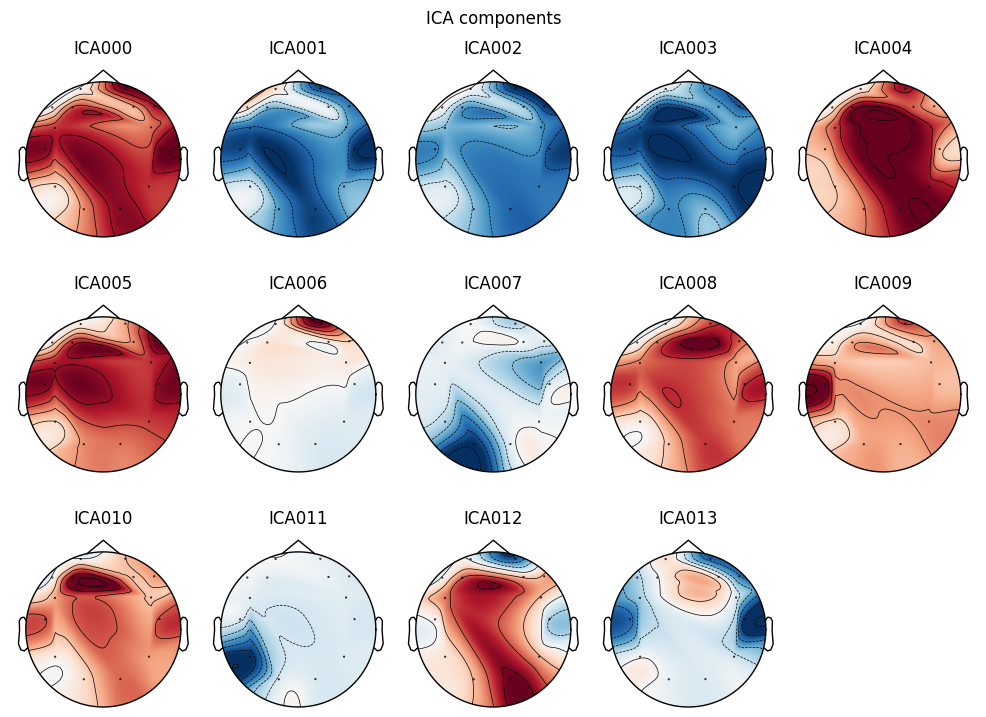

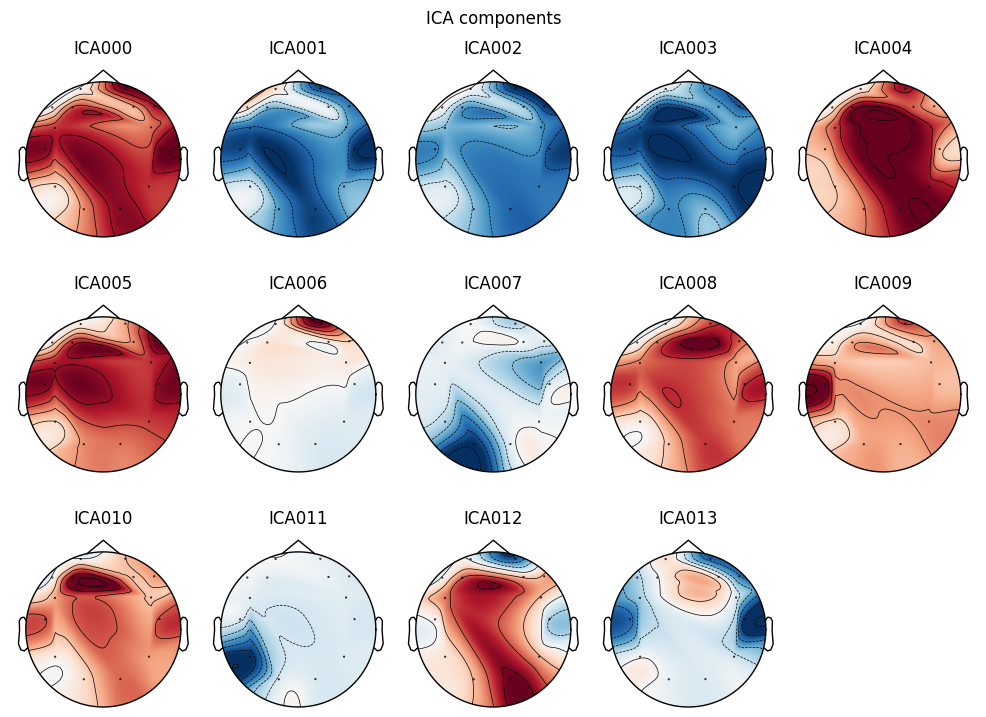

In [ ]:
ica.plot_components()


Creating RawArray with float64 data, n_channels=14, n_times=25472
    Range : 0 ... 25471 =      0.000 ...   198.992 secs
Ready.
Using matplotlib as 2D backend.


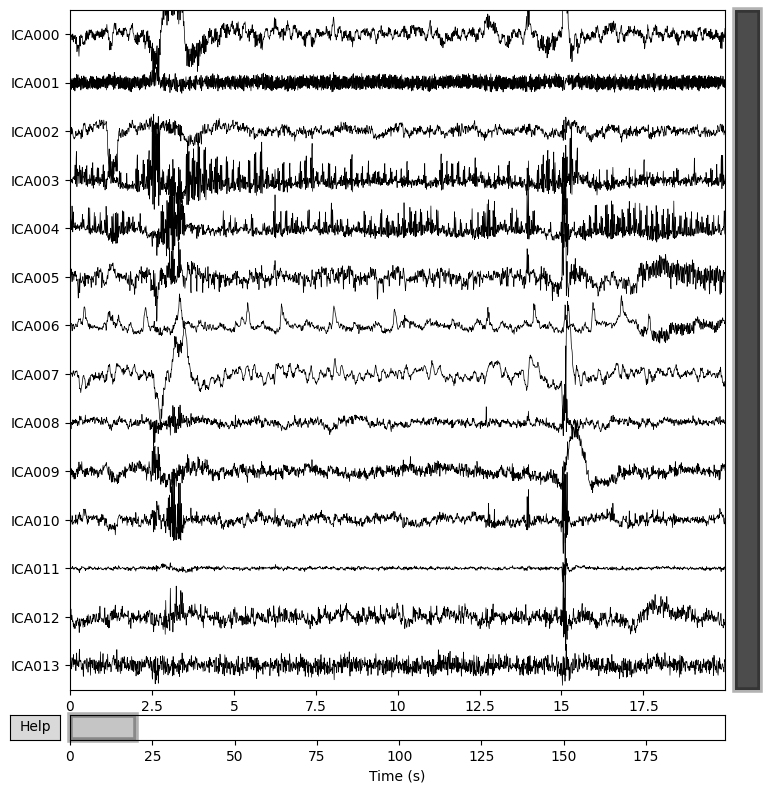

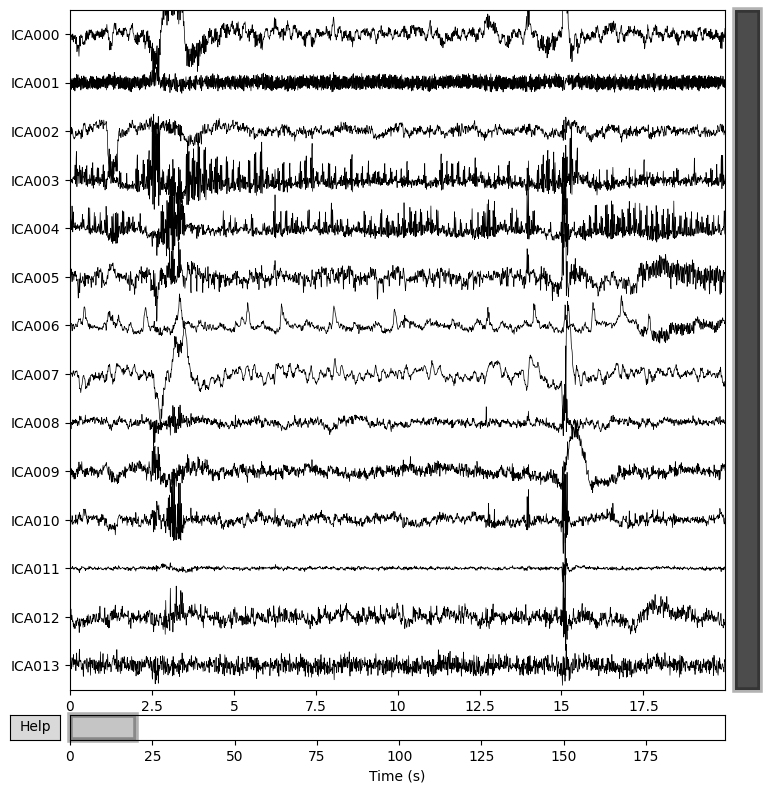

In [ ]:
ica.plot_sources(raw_filt)


In [ ]:
import numpy as np

FREQ_BANDS = {
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta":  (13, 30)
}


In [ ]:
from scipy.signal import welch

def compute_psd(signal, fs):
    freqs, psd = welch(
        signal,
        fs=fs,
        nperseg=fs*2,     # 2-second window
        noverlap=fs,
        scaling='density'
    )
    return freqs, psd


In [ ]:
def band_power(freqs, psd, band):
    low, high = band
    idx = np.logical_and(freqs >= low, freqs <= high)
    return np.trapz(psd[idx], freqs[idx])


In [ ]:
def baseline_corrected_bandpower(eeg_signal, fs, baseline_sec=3):
    baseline_samples = int(baseline_sec * fs)

    baseline = eeg_signal[:baseline_samples]
    trial = eeg_signal[baseline_samples:]

    freqs_b, psd_b = compute_psd(baseline, fs)
    freqs_t, psd_t = compute_psd(trial, fs)

    features = {}

    for band_name, band_range in FREQ_BANDS.items():
        baseline_power = band_power(freqs_b, psd_b, band_range)
        trial_power = band_power(freqs_t, psd_t, band_range)

        features[band_name] = trial_power - baseline_power

    return features


In [41]:
raw_filt


<RawArray | 14 x 25472 (199.0 s), ~2.7 MiB, data loaded>

In [44]:
from scipy.io import loadmat
ta = loadmat('/content/drive/MyDrive/DREAMER.mat')


In [47]:
ta['DREAMER'].dtype


dtype([('Data', 'O'), ('EEG_SamplingRate', 'O'), ('ECG_SamplingRate', 'O'), ('EEG_Electrodes', 'O'), ('noOfSubjects', 'O'), ('noOfVideoSequences', 'O'), ('Disclaimer', 'O'), ('Provider', 'O'), ('Version', 'O'), ('Acknowledgement', 'O')])

In [53]:
data = ta['DREAMER'][0,0]['Data']
type(data), data.shape


(numpy.ndarray, (1, 23))

In [54]:
subject = ta['DREAMER'][0,0]['Data'][0,0]
subject.dtype


dtype([('Age', 'O'), ('Gender', 'O'), ('EEG', 'O'), ('ECG', 'O'), ('ScoreValence', 'O'), ('ScoreArousal', 'O'), ('ScoreDominance', 'O')])

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
eeg_struct = subject['EEG']
type(eeg_struct), eeg_struct.shape


(numpy.ndarray, (1, 1))

In [57]:
eeg_entry = eeg_struct[0,0]
eeg_entry.dtype


dtype([('baseline', 'O'), ('stimuli', 'O')])

In [58]:
# Access Data
data = ta['DREAMER'][0,0]['Data']

# Select subject 0
subject = data[0,0]

# Access EEG container
eeg_struct = subject['EEG'][0,0]

# Extract stimulus EEG for video 0  ✅ CORRECT FIELD
eeg = eeg_struct['stimuli'][0,0][0]

# Transpose to (channels, samples)
eeg = eeg.T

print(eeg.shape)


(1,)


<class 'numpy.ndarray'>
(14, 25472)


In [62]:
electrodes = ta['DREAMER'][0,0]['EEG_Electrodes']
type(electrodes), electrodes.shape


(numpy.ndarray, (1, 14))

In [63]:
electrodes_entry = electrodes[0,0]
type(electrodes_entry), electrodes_entry.shape


(numpy.ndarray, (1,))

In [64]:
electrodes_entry.dtype


dtype('<U3')

In [67]:
electrodes = ta['DREAMER'][0,0]['EEG_Electrodes']

# Convert MATLAB char array to list of strings
ch_names = [''.join(e).strip() for e in electrodes[0,0]]

print(len(ch_names))
print(ch_names)


1
['AF3']


In [68]:
print(len(ch_names))
print(ch_names)


1
['AF3']


In [70]:
ch_names = [
    'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1',
    'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4'
]

print(len(ch_names))
print(ch_names)


14
['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']


In [71]:
import mne

sfreq = 128
ch_types = ['eeg'] * len(ch_names)

info = mne.create_info(
    ch_names=ch_names,
    sfreq=sfreq,
    ch_types=ch_types
)

raw = mne.io.RawArray(eeg, info)


Creating RawArray with float64 data, n_channels=14, n_times=25472
    Range : 0 ... 25471 =      0.000 ...   198.992 secs
Ready.


In [81]:
raw_car = raw.copy().set_eeg_reference('average')


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


In [82]:
raw_car.filter(0.5, 45)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 845 samples (6.602 s)



<RawArray | 14 x 25472 (199.0 s), ~2.7 MiB, data loaded>

In [83]:
psd = raw_car.compute_psd(method='welch', fmin=0.5, fmax=45, n_fft=256)
psds = psd.get_data()
freqs = psd.freqs


Effective window size : 2.000 (s)


In [84]:
import numpy as np
import pandas as pd

def bandpower(psd, freqs, fmin, fmax):
    idx = (freqs >= fmin) & (freqs <= fmax)
    return psd[:, idx].mean(axis=1)

feature_df = pd.DataFrame({
    'delta': bandpower(psds, freqs, 0.5, 4),
    'theta': bandpower(psds, freqs, 4, 8),
    'alpha': bandpower(psds, freqs, 8, 13),
    'beta': bandpower(psds, freqs, 13, 30),
    'gamma': bandpower(psds, freqs, 30, 45)
})

feature_df


,delta,theta,alpha,beta,gamma
0,809.817218,205.527420,11.010351,42.610942,0.836766
1,706.877816,169.637598,8.948944,34.877016,0.694209
2,37.086312,6.341837,0.623228,3.641493,0.205581
3,60.960968,9.014821,0.785193,6.881781,0.201857
4,242.615012,51.842085,2.870371,23.196389,1.080646
5,523.369885,105.084167,6.490924,14.977793,0.517468
6,108.838075,13.676213,1.156044,1.378598,0.203504
7,222.047055,43.807624,2.837543,23.015087,1.385692
8,70.777529,15.159892,1.061938,1.848220,0.215922
9,264.970118,60.698663,3.146822,34.124094,0.837319


In [85]:
X = feature_df.values


In [86]:
valence = ta['DREAMER'][0,0]['Data'][0][0]['ScoreValence'][0][0][0][0]
arousal = ta['DREAMER'][0,0]['Data'][0][0]['ScoreArousal'][0][0][0][0]
dominance = ta['DREAMER'][0,0]['Data'][0][0]['ScoreDominance'][0][0][0][0]

valence, arousal, dominance


(np.uint8(4), np.uint8(3), np.uint8(2))

In [87]:
def binarize(score, threshold=3):
    return 1 if score >= threshold else 0

y_valence = binarize(valence)
y_arousal = binarize(arousal)
y_dominance = binarize(dominance)


In [88]:
y = y_valence


In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, [y]*len(X), test_size=0.2, random_state=42
)


In [91]:
import numpy as np

# Access subject 0
data = ta['DREAMER'][0,0]['Data'][0]
subject = data[0]  # subject 0

# EEG structure
eeg_struct = subject['EEG'][0,0]
stimuli = eeg_struct['stimuli'][0,0]   # shape (23, 1)

print(stimuli.shape)  # should be (23, 1)


(18, 1)


In [93]:
n_trials = stimuli.shape[0]


In [94]:
n_trials = stimuli.shape[0]
print("Number of trials:", n_trials)


Number of trials: 18


In [95]:
feature_list = []

for i in range(n_trials):
    eeg = stimuli[i,0].T   # (14, samples)

    raw = mne.io.RawArray(eeg, info, verbose=False)
    raw.set_eeg_reference('average', verbose=False)
    raw.filter(0.5, 45, verbose=False)

    psds, freqs = raw.compute_psd(
        method='welch',
        fmin=0.5,
        fmax=45,
        n_fft=256
    ).get_data(return_freqs=True)

    features = [
        bandpower(psds, freqs, 0.5, 4),
        bandpower(psds, freqs, 4, 8),
        bandpower(psds, freqs, 8, 13),
        bandpower(psds, freqs, 13, 30),
        bandpower(psds, freqs, 30, 45)
    ]

    feature_list.append(features)


Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)


In [96]:
X = np.array(feature_list)
print(X.shape)


(18, 5, 14)


In [97]:
X = np.array(feature_list)
print(X.shape)


(18, 5, 14)


In [98]:
X = X.mean(axis=2)
print(X.shape)


(18, 5)


In [101]:
valence_raw = subject['ScoreValence'][0][:n_trials]

# Extract scalar values
valence = np.array([v[0][0] for v in valence_raw])



In [102]:
y = np.array([1 if v >= 5 else 0 for v in valence])


In [103]:
print(y)
print(y.shape)
print(np.unique(y))


[0]
(1,)
[0]


In [104]:
print(X.shape)
print(y.shape)


(18, 5)
(1,)


In [105]:
valence_raw = subject['ScoreValence'][0][:n_trials]


In [107]:
print(type(valence_raw[0]))
print(valence_raw[0].shape)


<class 'numpy.ndarray'>
(18, 1)


In [108]:
valence_raw = subject['ScoreValence'][0]   # shape (18, 1)

valence = valence_raw.flatten()


In [109]:
print(valence)
print(valence.shape)


[array([[4],
        [3],
        [5],
        [4],
        [4],
        [1],
        [5],
        [1],
        [1],
        [5],
        [4],
        [4],
        [4],
        [3],
        [2],
        [3],
        [1],
        [3]], dtype=uint8)]
(1,)


In [112]:
print(type(valence))
print(valence.shape)
print(type(valence[0]))
print(valence[0])


<class 'numpy.ndarray'>
(1,)
<class 'numpy.ndarray'>
[[4]
 [3]
 [5]
 [4]
 [4]
 [1]
 [5]
 [1]
 [1]
 [5]
 [4]
 [4]
 [4]
 [3]
 [2]
 [3]
 [1]
 [3]]


In [116]:
print(type(valence_raw[0]))
print(valence_raw[0].shape)


<class 'numpy.ndarray'>
(18, 1)


In [117]:
valence_raw = subject['ScoreValence'][0]
n_trials = valence_raw.shape[0]

valence = np.zeros(n_trials)

for i in range(n_trials):
    valence[i] = valence_raw[i][0]


/tmp/ipython-input-2074304080.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  valence[i] = valence_raw[i][0]


In [118]:
print(valence)
print(valence.shape)


[4.]
(1,)


In [119]:
y = np.where(valence >= 5, 1, 0)
print(np.unique(y))


[0]


In [120]:
print(valence.shape)
print(np.unique(y))


(1,)
[0]


In [121]:
print(valence.shape)
print(np.unique(y))


(1,)
[0]


In [122]:
print(X.shape)
print(y.shape)
print(np.unique(y, return_counts=True))


(18, 5)
(1,)
(array([0]), array([1]))


In [124]:
valence_raw = subject['ScoreValence'][0]
print(valence_raw.shape)


(1,)


In [125]:
valence_raw = subject['ScoreValence'][0][0]
print(valence_raw.shape)


(18, 1)


In [126]:
valence = valence_raw.flatten()
print(valence.shape)
print(valence)


(18,)
[4 3 5 4 4 1 5 1 1 5 4 4 4 3 2 3 1 3]


In [127]:
y = np.where(valence >= 5, 1, 0)


In [128]:
print(y)
print("Class counts:", np.unique(y, return_counts=True))


[0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
Class counts: (array([0, 1]), array([15,  3]))


In [129]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (18, 5)
y shape: (18,)


In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [131]:
from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(X_train, y_train)


SVC()

In [132]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [133]:
import numpy as np
import mne
import matplotlib.pyplot as plt


In [134]:
ch_names = [
    'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1',
    'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4'
]

print(len(ch_names))


14


In [135]:
# Example: mean band power per channel (replace if you already have these)
delta_power = np.mean(feature_df['delta'].values.reshape(14, -1), axis=1)
theta_power = np.mean(feature_df['theta'].values.reshape(14, -1), axis=1)
alpha_power = np.mean(feature_df['alpha'].values.reshape(14, -1), axis=1)
beta_power  = np.mean(feature_df['beta'].values.reshape(14, -1), axis=1)

print(alpha_power.shape)


(14,)


In [136]:
sfreq = 128  # DREAMER EEG sampling rate

info = mne.create_info(
    ch_names=ch_names,
    sfreq=sfreq,
    ch_types='eeg'
)


In [137]:
montage = mne.channels.make_standard_montage('standard_1020')
info.set_montage(montage)


<Info | 8 non-empty values
 bads: []
 ch_names: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4
 chs: 14 EEG
 custom_ref_applied: False
 dig: 17 items (3 Cardinal, 14 EEG)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 14
 projs: []
 sfreq: 128.0 Hz
>

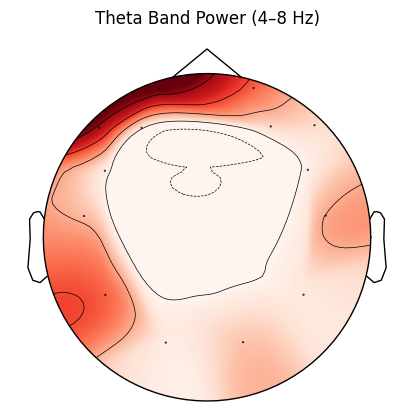

In [139]:
fig, ax = plt.subplots()

mne.viz.plot_topomap(
    theta_power,
    info,
    axes=ax,
    cmap='Reds',
    show=False
)

ax.set_title('Theta Band Power (4–8 Hz)')
plt.show()


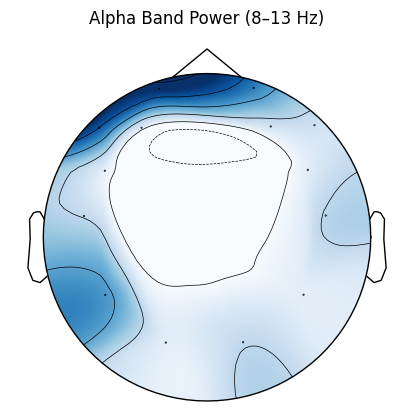

In [140]:
fig, ax = plt.subplots()

mne.viz.plot_topomap(
    alpha_power,
    info,
    axes=ax,
    cmap='Blues',
    show=False
)

ax.set_title('Alpha Band Power (8–13 Hz)')
plt.show()


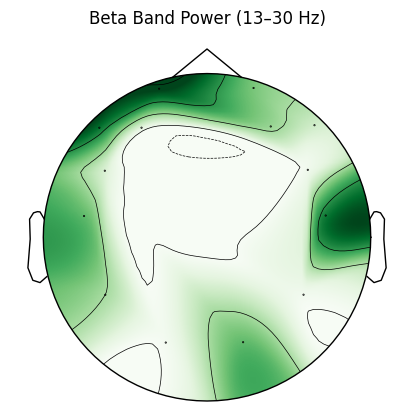

In [141]:
fig, ax = plt.subplots()

mne.viz.plot_topomap(
    beta_power,
    info,
    axes=ax,
    cmap='Greens',
    show=False
)

ax.set_title('Beta Band Power (13–30 Hz)')
plt.show()
